<a href="https://colab.research.google.com/github/alinyaraujos/machine-learning/blob/activity-3/neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/heart.csv')

In [4]:
dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [ ]:
#Re-escala dos dados usando usando máximo e mínimo
dados = (dados - dados.min())/(dados.max()-dados.min())

In [8]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.iloc[:,:-1]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
y = dados.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#Dividindo a matriz em um conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [16]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2


In [17]:
y_train.head()

63     1
107    1
147    1
66     1
54     1
Name: target, dtype: int64

In [18]:
from sklearn.neural_network import MLPClassifier

In [19]:
#definindo modelo
classificador = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

In [20]:
#treinando modelo - lista de parâmetros que podem ser ajustados
classificador.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [21]:
#realizando classificação
classificacao = classificador.predict(X_test)
classificacao

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [30]:
#calculando acurácia
curacia = accuracy_score(y_test,classificacao)
round(curacia,3)

0.689

In [31]:
#calculando precisão
precisao = precision_score(y_test,classificacao)
round(precisao,3)

0.595

In [32]:
#calculando recall (revocação)
from sklearn.metrics import recall_score

In [33]:
recall = recall_score(y_test,classificacao)
round(recall,3)

0.926

In [34]:
#calculando f1-score
from sklearn.metrics import f1_score

In [35]:
f1 = f1_score(y_test,classificacao)
round(f1,3)

0.725

In [37]:
#plotando curva roc - Relação entre falsos positivos e verdadeiro positivo
from sklearn.metrics import roc_curve

In [38]:
fpr, tpr, _ = roc_curve(y_test,classificacao)

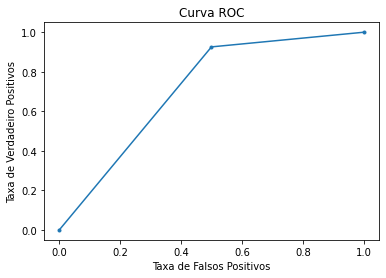

In [39]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

In [41]:
#calculando area sob a curva ROC
from sklearn.metrics import roc_auc_score

In [42]:
#área da curva - é o resultado da imagem de forma númerica
auc = roc_auc_score(y_test,classificacao)
round(auc,3)

0.713

Validação Cruzada

In [43]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [45]:
#define modelo
classificador = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

In [46]:
#calculando os scores
scores = cross_val_score(classificador,X,y,cv=10)
scores

array([0.87096774, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.83333333, 0.86666667, 0.63333333, 0.76666667])

In [47]:
#Esse modelo têm uma taxa de acerto média de 82,5% com um desvio padrão de 0.074
round(scores.mean(),3),round(scores.std(),3)

(0.825, 0.074)

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [49]:
#criando árvore
arvore = DecisionTreeClassifier()

#calculando os scores
scores_arvore = cross_val_score(arvore,X,y,cv=10)

In [50]:
#criando random forest
floresta = RandomForestClassifier()

#calculando os scores
scores_floresta = cross_val_score(floresta,X,y,cv=10)

In [51]:
#criando rede neural
mlp = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

#calculando os scores
scores_mlp = cross_val_score(mlp,X,y,cv=10)

In [52]:
#comparação entre os métodos - os resultados da Radom Forest e MLP foram os mesmo em percentual, porém com um desvio padrão diferente.  
print('Árvore de Decisão: ', round(scores_arvore.mean(),3),round(scores_arvore.std(),3))
print('Random Forest: ', round(scores.mean(),3),round(scores.std(),3))
print('MLP:', round(scores_mlp.mean(),3),round(scores_mlp.std(),3))

Árvore de Decisão:  0.788 0.074
Random Forest:  0.825 0.074
MLP: 0.825 0.079


**Otimização de Parâmetros**

In [53]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV

In [140]:
param_grid = [
              {
                  'hidden_layer_sizes':  [(10),(50),(100),(50,10),(100,50)],
                  'activation': ['identity', 'logistic', 'tanh', 'relu'],
                  'solver': ['lbfgs', 'sgd', 'adam'],
                  'max_iter': [500, 1000, 2000]
              }
              
]

In [141]:
mlp = RandomizedSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

In [145]:
#Fazer o treinamento 
mlp.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                                           verbose=False, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{

In [143]:
#Melhores parâmetros 
print(mlp.best_params_)

{'solver': 'adam', 'max_iter': 1000, 'hidden_layer_sizes': 50, 'activation': 'logistic'}


In [144]:
#melhor score
print(round(mlp.best_score_,3))

0.828


**Grid search**

*   monta um espaço de soluções reduzido como um reticulado
*   testa todas as soluções, guardando a melhor
# Nova seção

In [60]:
from sklearn.model_selection import GridSearchCV

In [146]:
mlp = GridSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

In [147]:
mlp.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'activation': [

In [148]:
#melhores parâmetros
print(mlp.best_params_)

{'activation': 'logistic', 'hidden_layer_sizes': 50, 'max_iter': 2000, 'solver': 'adam'}


In [149]:
#melhor score
print(mlp.best_score_)

0.8379234972677596


**Usando Grid search conseguimos obter um score maior que o Random search, principalmente porque testa todas as soluções, guardando a melhor.**



In [65]:
#resultado em cada uma das configurações
mlp.cv_results_

{'mean_fit_time': array([5.23214340e-03, 4.06405926e-02, 2.57492399e-01, 3.63063812e-03,
        2.72419453e-02, 1.86798000e-01, 3.91411781e-03, 3.93228531e-02,
        1.50595808e-01, 6.62846565e-03, 8.31882477e-02, 1.55654860e-01,
        6.40335083e-03, 6.40216827e-02, 1.55280113e-01, 6.69689178e-03,
        7.54848480e-02, 1.79851246e-01, 8.33849907e-03, 7.15077877e-02,
        1.62787628e-01, 1.85035133e-01, 7.03647614e-02, 1.23386669e-01,
        8.31270218e-03, 7.90893555e-02, 1.50623322e-01, 7.47642517e-03,
        6.56735897e-02, 8.77867699e-02, 5.10106087e-03, 5.37568569e-02,
        1.00363779e-01, 5.02567291e-03, 4.74741459e-02, 9.67567921e-02,
        3.10285091e-02, 1.32942343e-01, 1.26955366e-01, 1.63892746e-02,
        1.26490116e-01, 1.50290728e-01, 1.57694340e-02, 1.32147074e-01,
        1.15845394e-01, 1.50852871e-01, 2.80463839e-01, 3.51235294e-01,
        8.98170471e-02, 1.44538641e-01, 4.02366686e-01, 4.59833241e-01,
        1.47267723e-01, 4.15061235e-01, 7.12951